#11110EE466000 Introduction of Reinforcement Learning Exam 1


Scoring rule: 

ONLY modify your code in the comment block to ensure your functions can be tested correctly.

Please run the following block first.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt


## Problem 1 Average (10%)

### 1.1 (10%):Average function
Given a list of rewards, please return a list of average rewards.
That is, the $n^{th}$ element in the output list is the average of $1^{st}$ to $n^{th}$ elements of input.

---



For example

input = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

output = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]

---

input = [-1, -2, 30, 45, 58, 61, 722, 879]

output = [-1.0, -1.5, 9.0, 18.0, 26.0, 31.833333333333332, 130.42857142857142, 224.0]

---

In [5]:
def problem1_1(rewards):
  average_rewards = []
###### Your code here ######
  for j in range(len(rewards)):
    sum_all = 0
    for i in range(j + 1):
      sum_all += rewards[i]
      if(i == j):
        sum_all = sum_all/(i + 1)
        average_rewards.append(sum_all)

################################

  return average_rewards

####Test your function

In [6]:
print("example1 result:",problem1_1([1,2,3,4,5,6,7,8,9,10,11,12,13,14]))
print("example2 result:",problem1_1([-1,-2,30,45,58,61,722,879]))

example1 result: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]
example2 result: [-1.0, -1.5, 9.0, 18.0, 26.0, 31.833333333333332, 130.42857142857142, 224.0]


## Problem 2 k-armed bandit environment (30%)
Implement a k-armed bandit environment.


### 2.1 (10%):  Epsilon greedy function
Implement epsilon greedy function: the inputs are epsilon and q_values, and the output is an action which is an integer.



For example,

input: q_values = [10, 80, -30, 30, 60], epsilon = 0.5

output: action = 1 for 50% of the time, giving random action 50% of the time.

We will run this function several times, and use histogram to evaluate your answer.

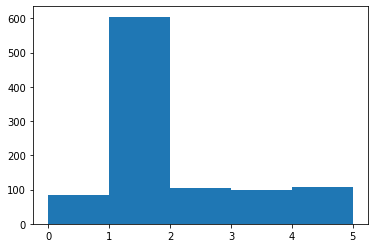



---



input q_values = [10, 50, 60, 70, 50, 30, -10], epislon = 0.8

output: action = 3 for 20% of the time, giving random action 80% of the time.

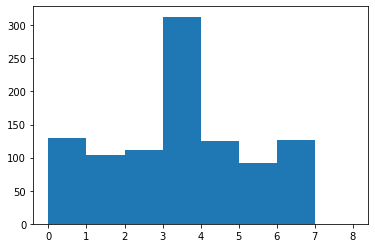

In [10]:
def problem2_1(q_value,epsilon):
###### Your code here ######
  if rd.rand() > epsilon:
    action = np.argmax(q_value)
  else:  
    action = rd.randint(0,len(q_value))
################################
  return action

#### Test your function

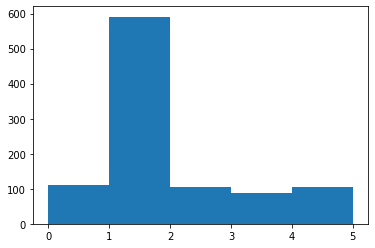

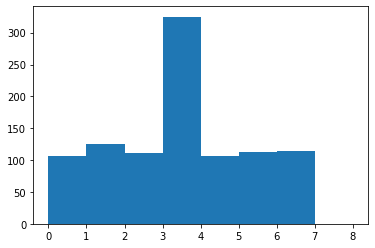

In [12]:
test = [problem2_1([10,80,-30,30,60],0.5) for i in range(1000)]
plt.hist(test,[0,1,2,3,4,5])
plt.show()

test = [problem2_1([10, 50, 60, 70, 50, 30, -10], 0.8) for i in range(1000)]
plt.hist(test,[0,1,2,3,4,5,6,7,8])
plt.show()

### 2.2 (10%): q-value update

Implement the q-value update rule under a non-stationary environment. 

The inputs are the list of q-values, an action and the corresponding reward. 

Update the q-values in your function and return the new q-values in a list form.

For example,

Input: q_value = [1, 5, 9, 2, 6, 7], action = 2, reward = 7

The output should be something like: new_q_value = [1, 5, <font color=#FF0000>8</font> (depends on your design), 2, 6, 7]

You should design your updated rule properly to get better average rewards when testing.

In [22]:

def problem2_2(q_value, action, reward):
  new_q_value = q_value
###### Your code here ######
  #new_q_value = q_value # you should change this.
  new_q_value[action] = q_value[action] + (reward - q_value[action]) 
################################
  return new_q_value

###2.3 (10%):  k-armed bandit algorithm

The initial rewards are [5, 4, 2, 1, 2, 5], but it will change to [5, 4, 20, 10, 2, 5] after reaching 500 steps.

If you implement the update function correctly, your average reward should reach over 15 at the end of the trail.

  In order to complete k-armed bandit algorithm, please use the following function in code block.
  
  
  - step(action,i)
  - rewards.append(reward)
  - problem2_1(q_value,0.1)
  - problem2_2(q_value,action,reward)

  

In [23]:
def step(action,i):
  rewards = [5,4,2,1,2,5]

  if i>500:
    rewards = [5,4,20,10,2,5]

  return rewards[action]



def problem2_3():
  q_value = [0]*6
  rewards = []

  for i in range(4000): 

    ###### Your code here ######
    action = problem2_1(q_value,0.1)
    reward = step(action,i)
    problem2_2(q_value,action,reward)
    rewards.append(reward)
    
    ################################
  

  return rewards


#### Test your function

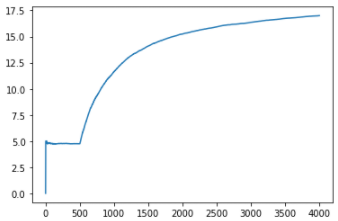

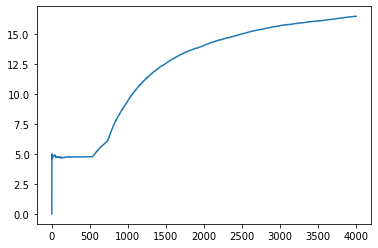

In [24]:
plt.plot([0]+problem1_1(problem2_3()))


## Problem 3 Dynamic programming for continuous task (20%)




Given the following figure, please implement the corresponding environment.

In this environment, the tiles in red represent walls.

In this grid world, four actions can be taken: left, up, right and down.


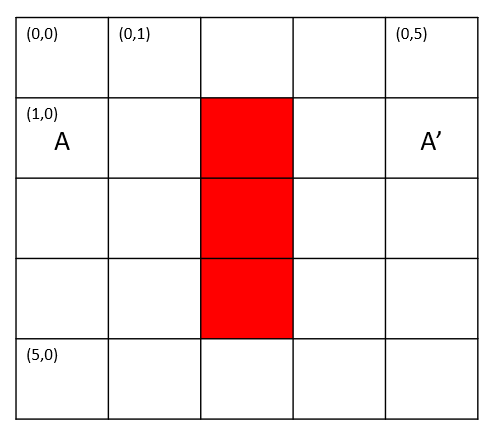

### 3.1 (10%): Environment
Given a state and an action, please write a function that returns all the possible next-states and the corresponding rewards, if an agent moves to tile A, it will teleport into tile A', and gets 50 reward. When an agent is off the grid or hits the wall, its state will be unchanged.And all other transitions yield reward 0.

The input state is a list, and the action should be chosen from the variable 'ACTIONS'.

And the output is a list with [next_state, reward].

Use the following logic in order: 
1. perform the action
2. check if the state is out of bound -> this should be one of the return state
---



For example, 

input = [1,1], ACTIONS[2]

output = [[1,1], 0]



---


input = [4,4], ACTIONS[1]

output = [[3,4], 0]


---


input = [1,0], ACTIONS[3]

output = [[1,4], 50]


---


input = [3,1], ACTIONS[0]

output = [[3,0], 0]


---

input = [0,4], ACTIONS[2]

output = [[0,4], 0]


In [25]:
ACTIONS = [np.array([0, -1]), np.array([-1, 0]), np.array([0, 1]), np.array([1, 0])] # left, up, right, down

In [26]:
def problem3_1(state, action):
  ###### Your code here ######
  after_state = [0]*2
  output = [0]*2
  after_state[0] = state[0] + action[0]
  after_state[1] = state[1] + action[1]

  if state[0] == 1 and state[1] == 0:
    output = [[1,4]]
    output.append(50)
  elif after_state[0] > 4 or after_state[0] <0 or after_state[1] > 4 or after_state[1] <0:
    output = [state]
    output.append(0)
  elif after_state[0] == 1 and after_state[1] == 2:
    output = [state]
    output.append(0) 
  elif after_state[0] == 2 and after_state[1] == 2:
    output = [state]
    output.append(0)
  elif after_state[0] == 3 and after_state[1] == 2:
    output = [state]
    output.append(0)
  else:
    output = [after_state]
    output.append(0)  
  return  output#something
  ################################

#### Test your function

In [27]:
print(problem3_1([1,1], ACTIONS[2]))
print(problem3_1([4,4], ACTIONS[1]))
print(problem3_1([1,0], ACTIONS[3]))
print(problem3_1([3,1], ACTIONS[0]))
print(problem3_1([0,4], ACTIONS[2]))


[[1, 1], 0]
[[3, 4], 0]
[[1, 4], 50]
[[3, 0], 0]
[[0, 4], 0]


###3.2 (10%): Policy evaluation using dynamic programming
Using the function in 3.1, please evaluate the optimal policy in the environment.

Use the Bellman equation with transition probabilities to calculate the result.


In [37]:
#hint: greedy action selection, notice discounted rate = 0.9
def problem3_2():
    
    WORLD_SIZE=5
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    next_value=[0,0,0,0]
    while True:
        # keeping iteratiing until convergence
        ####################CODE############################
        new_value = np.zeros(value.shape)
        # optimal value function 
        for i in range(5):
          for j in range(5):
            for k in ACTIONS:
              next_state_r = problem3_1([i,j] , k)
              if i==1 and j==2:
                new_value[i,j] = 0
                continue
              elif i==2 and j==2:
                new_value[i,j] = 0
                continue
              elif i==3 and j==2:
                new_value[i,j] = 0
                continue

              tem = (next_state_r[1] + 0.9 * value[next_state_r[0][0],next_state_r[0][1]])
              if tem > new_value[i,j]:
                new_value[i,j] = tem
        if np.sum(np.abs(new_value - value)) < 1e-4:
            return new_value

        value = new_value
        ####################CODE############################

In [28]:
from matplotlib.table import Table
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text='%.2f' %image[i][j], 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)

#### Test your function
No test data.

<font color=#FF0000>

**You need to give the correct answer in this problem.**
</font>


(Hint: We provide some final values that may help you check your result.

value[2, 1] = 95,84, value[2, 3] = 0, value[5, 5] = 45.84) 

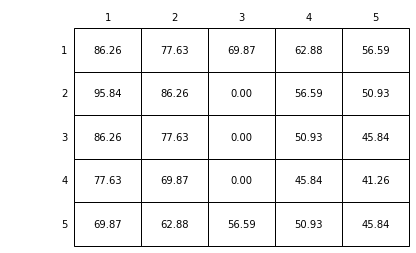

In [38]:
draw_image(problem3_2())

## Problem 4 Dynamic programming for episodic task (40%)

> Indented block


Given the following figure, please implement the corresponding environment.

In this environment, the tiles in green represent swamp. The yellow one represents the terminal state.

In this grid world, four actions can be taken: left, up, right and down.

Moreover, there is intermittent wind on the field. 

<font color=#FF0000>

**After an action is taken, there is a 50% chance that the agent can be blown to the right, i.e., S'<-S'+(0,1) with the probability of 0.5**
</font>

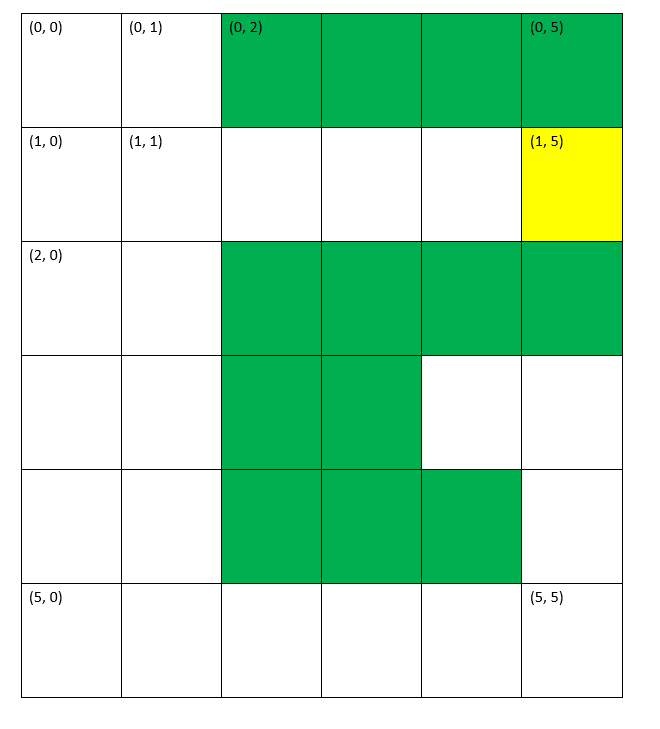

### 4.1 (20%): Environment
Given a state and an action, write a function that returns all possible next-states and the corresponding rewards, it's
-100 if an agent moves into swamp, and all other transitions are -1.

The input state is a list, and the action should be chosen from the variable 'ACTIONS'.

And the output is a list with [next_state1, reward1, next_state2, reward2].

Use the following logic in order: 
1. perform the action
2. check if the state is out of bound -> this should be one of the return state
3. get blown
4. check if the state is out of bound -> this should be the other state to return

---



For example, 

input = [1,5], ACTIONS[3]

output = [[2,5], -100, [2,5], -100]



---


input = [5,5], ACTIONS[0]

output = [[5,4], -1, [5,5], -1]


---


input = [3,2], ACTIONS[2]

output = [[3,3], -100, [3,4], -1]


---


input = [0,5], ACTIONS[2]

output = [[0,5], -100, [0,5], -100]


---

input = [0,0], ACTIONS[0]

output = [[0,0], -1, [0,1], -1]


In [39]:
ACTIONS = [np.array([0, -1]), np.array([-1, 0]), np.array([0, 1]), np.array([1, 0])] # left, up, right, down

In [50]:
def problem4_1(state, action):
  ###### Your code here ######
  after_state = [0]*2
  output = [0]*2
  after_state[0] = state[0] + action[0]
  after_state[1] = state[1] + action[1]
  if after_state[0] < 0 or after_state[0]>5 or after_state[1]<0 or after_state[1]>5:
    output = [state]
    if state[0] == 0 and state[1] >= 2 and state[1] <=5:
      output.append(-100)
    elif state[0] == 2 and state[1] >= 2 and state[1] <=5:
      output.append(-100)
    elif state[0] == 3 and state[1] >= 2 and state[1] <=3:
      output.append(-100)
    elif state[0] == 4 and state[1] >= 2 and state[1] <=4: 
      output.append(-100)
    else:
      output.append(-1)
  elif after_state[0] == 0 and after_state[1] >= 2 and after_state[1] <=5:
    output = [after_state]
    output.append(-100)
  elif after_state[0] == 2 and after_state[1] >= 2 and after_state[1] <=5:
    output = [after_state]
    output.append(-100)
  elif after_state[0] == 3 and after_state[1] >= 2 and after_state[1] <=3: 
    output = [after_state]
    output.append(-100)
  elif after_state[0] == 4 and after_state[1] >= 2 and after_state[1] <=4: 
    output = [after_state]
    output.append(-100)
  else:
    output = [after_state]
    output.append(-1)
  
 
    
  if rd.rand() > 0.5:
    blown = [0]*2
    blown[0] = after_state[0] + 0
    blown[1] = after_state[1] + 1
    if blown[0] < 0 or blown[0] >5 or blown[1] >5 or blown[1] <0:
      output.append(output[0])
      output.append(output[1])
    elif blown[0] == 0 and blown[1] >= 2 and blown[1] <=5:
      output.append(blown)
      output.append(-100)
    elif blown[0] == 2 and blown[1] >= 2 and blown[1] <=5:
      output.append(blown)
      output.append(-100)
    elif blown[0] == 3 and blown[1] >= 2 and blown[1] <=3: 
      output.append(blown)
      output.append(-100)
    elif blown[0] == 4 and blown[1] >= 2 and blown[1] <=4: 
      output.append(blown)
      output.append(-100)
    else:
      output.append(blown)
      output.append(-1)
  else:
    output.append(output[0])
    output.append(output[1])
     

  return output  #something
  ################################

#### Test your function

In [66]:
print(problem4_1([1,5], ACTIONS[3]))
print(problem4_1([5,5], ACTIONS[0]))
print(problem4_1([3,2], ACTIONS[2]))
print(problem4_1([0,5], ACTIONS[2]))
print(problem4_1([0,0], ACTIONS[0]))


[[2, 5], -100, [2, 5], -100]
[[5, 4], -1, [5, 4], -1]
[[3, 3], -100, [3, 3], -100]
[[0, 5], -100, [0, 5], -100]
[[0, 0], -1, [0, 0], -1]


###4.2 (10%): Policy evaluation using dynamic programming
Using the function in 4.1, evaluate the equiprobable random policy in this environment, i.e., every action has 25% chance to be chosen.

Use the Bellman equation with transition probabilities to calculate the result.

Note that the discount rate is one, and the value of the terminal state should always be zero.

In [95]:
def problem4_2():
    value = np.zeros((6, 6))
    while True:
        # keeping iterating until convergence
        new_value = np.zeros((6, 6))

        ###### Your code here ######
        for i in range(6):
          for j in range(6):
            for k in ACTIONS:
              next_state_r = problem4_1([i,j] , k)
              #it will make value[1,5] = 0
              if i==1 and j==5:
                new_value[i,j] = 0
                continue
              
              new_value[i,j] += 0.25 * (next_state_r[3] + 1.0 * value[next_state_r[2][0],next_state_r[2][1]])
             
              
              #print(next_state_r[3])
              #print(next_state_r[2][0])
              #print(next_state_r[2][1])
        ################################
        print(np.sum(np.abs(new_value - value)))
        if np.sum(np.abs(new_value - value)) < 1e-4:
          return new_value

        value = new_value

    return value

#### Test your function
No test data.

<font color=#FF0000>

**You need to give the correct answer in this problem.**
</font>


(Hint: We provide some final values that may help you check your result.

value[2, 6] = 0, value[1, 1] = -752.28, value[6, 6] = -809.5) 

In [96]:
draw_image(problem4_2())

串流輸出內容已截斷至最後 5000 行。
933.131329504837
593.5767753397665
739.8678199028615
817.2465031677888
1155.847149957246
976.9376883481618
887.0870016366305
928.500047505228
680.2372643748718
819.5634870931107
537.0247447364891
774.5014925687931
786.0011544102423
683.0466320652073
1096.5028425547528
818.4517764830551
829.0729342900564
940.9447219182156
1083.5283963388288
1071.0297546086585
867.8049642107463
1062.7172203078203
1003.8622880682891
850.9764605394151
844.4389771484782
774.3585409920221
817.4438543133616
917.5162714001297
870.9784914816158
869.1287891887014
767.9547292932829
904.3229879322076
923.1881866236997
842.087372911747
1012.4399478937245
1167.3788618872868
1089.5892371622886
951.1574335513651
968.5325075252674
856.9261202989625
910.7854892132357
1232.461709778165
1087.0717450649943
845.3788694231006
968.4427782300892
1066.1549436627101
1099.6344162155392
877.0533376533793
736.3630759575806
686.8056531008849
997.9783784654277
689.459880464331
891.5263024318969
871.8107368945531


KeyboardInterrupt: ignored

###4.3 (10%): Policy improvement
Use dynamic programming to find an optimal policy in this environment.

You should calculate the q_value with Bellman equation and use the function from 4.1.

In [ ]:
def problem4_3():
    q_value = np.zeros((6,6,4))
    while True:
        # keeping iterating until convergence
        new_q_value = np.zeros((6,6,4))

        ###### Your code here ######
        
        ################################
            
        
        if np.sum(np.abs(new_q_value - q_value)) < 1e-4:
          return new_q_value

        q_value = new_q_value

    return q_value

#### Test your function
No test data.

<font color=#FF0000>

**You need to give the correct answer in this problem.**
</font>


(Hint: We provide some final values that may help you check your result.

q_value[1, 5] = [0, 0, 0, 0], q_value[0, 0] = [-4.9, -4.9, -53.7, -4.2], 

q_value[5, 5] = [-18.9, -20.9, -19.9, -19.9])

In [ ]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.1f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.1f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.1f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.1f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')

  plt.show()

In [ ]:
drawTable(problem4_3())

# Submission

'files' -> 'download' -> 'download .ipynb'


















































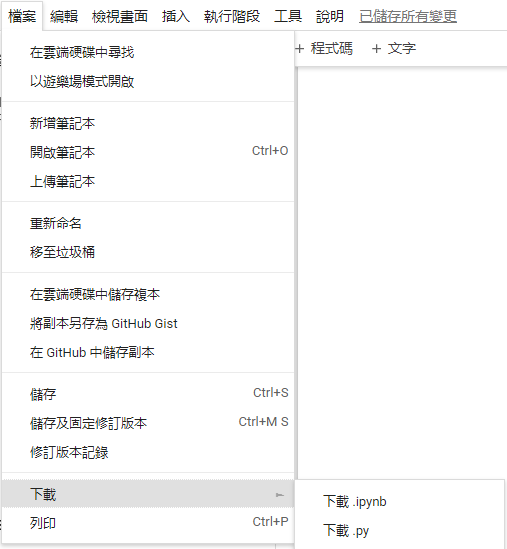











































Rename the file to 'exam1_{your name}.ipynb' and submit it to eeclass -> homework -> exam1.